In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

import os
os.chdir("C:/Users/hp/Desktop/Python Classess/Deep Learning/Project_II_end_to_end")

In [2]:
A = pd.read_csv("training_set.csv")

# Missing Data Treatment

In [3]:
from PM8wd import replacer
replacer(A)

In [4]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y


In [5]:
X = A[['LoanAmount','ApplicantIncome']]

# Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
from PM8wd import outliers
ol = outliers(Xnew)
Xnew = Xnew.drop(index=ol,axis=0)
Xnew.index = range(0,Xnew.shape[0])

X = X.drop(index=ol,axis=0)
X.index = range(0,X.shape[0])

# Create Clusters

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(Xnew)

In [8]:
Xnew['Cluster']=model.labels_

In [9]:
Xnew

,LoanAmount,ApplicantIncome,Cluster
0,0.000000,0.072651,0
1,-0.219273,0.000000,0
2,-0.957641,-0.394096,1
3,-0.314547,-0.462412,1
4,-0.064454,0.097389,0
...,...,...,...
589,-0.898095,-0.410479,1
590,-1.267279,-0.212902,1
591,1.269371,0.436842,2
592,0.483367,0.356730,0


Text(0, 0.5, 'Income')

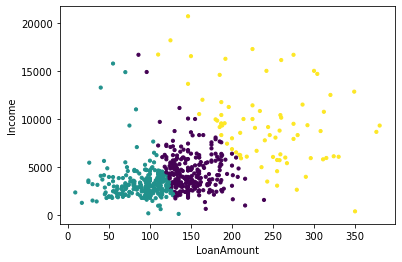

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X.LoanAmount,X.ApplicantIncome,s=10,c=model.labels_)
plt.xlabel("LoanAmount")
plt.ylabel("Income")